- Ziming Huang

#### Exercise 0

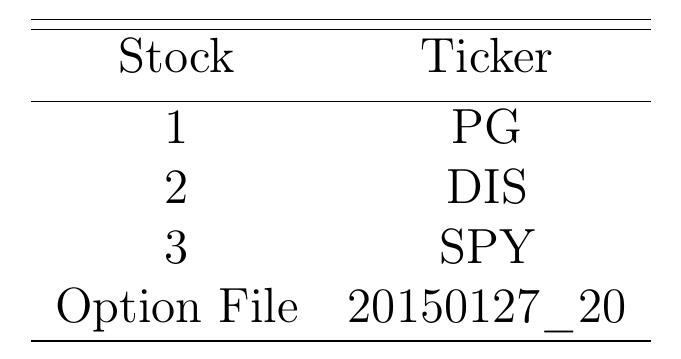

In [185]:
#0
from IPython.display import Image
Image("D:/ZM-Documents/MATLAB/final-exam-Ziming-Huang/figures/f.jpg",width=130,height=130)

#### Exercise 1

#### 1A

In [92]:
#1A
import numpy as np
def BS_put(K,S,T,r,q,sigma):
    from scipy.stats import norm
    d1=(np.log(S/np.array(K))+(r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    put=np.array(K)*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)
    return put

def HW_put(K,S,T,r,q,u):
    z=np.random.normal(0,1,1000)
    sigma=np.exp(np.log(u)-1.2**2/2+1.2*z)/100
    HW_opt=[]
    price=[]
    for s in sigma:
        price.append(BS_put(K,S,T,r,q,s))   
    HW_opt.append(sum(price)/1000)
    return HW_opt

In [93]:
K=[42.5,44,48,50,52,55]
S=50
r=0.013
T=90/365
sigma=0.4
q=0.025

BS_opt=BS_put(K,S,T,r,q,sigma)
HW_opt=HW_put(K,S,T,r,q,40)

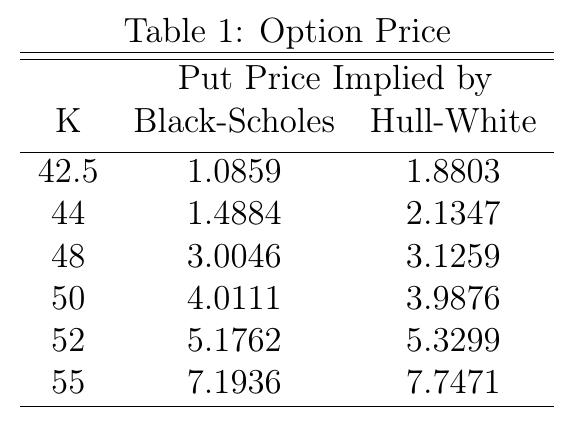

In [94]:
Image("D:/ZM-Documents/MATLAB/final-exam-Ziming-Huang/figures/a1.jpg",width=200,height=200)

#### 1B

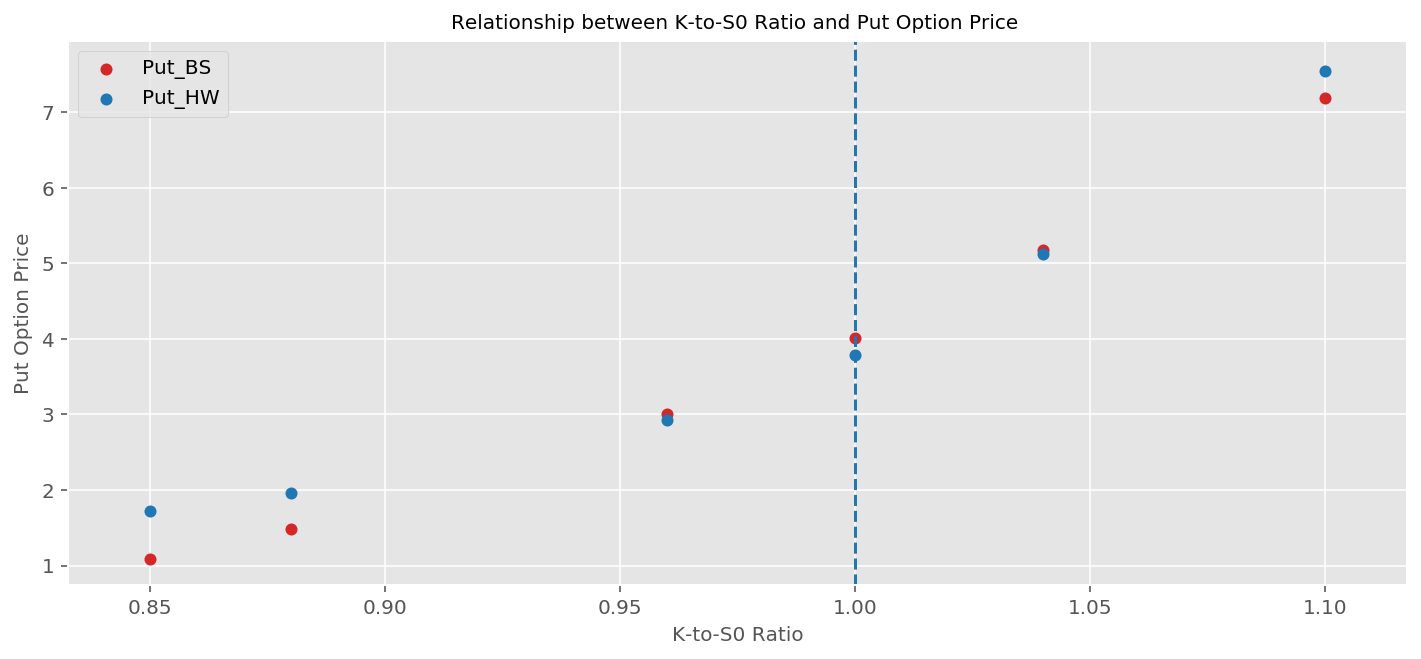

In [95]:
#2B
import matplotlib.pyplot as plt
K2S_ratio=K/np.array(S)
with plt.style.context("ggplot"): 
    #plt.rcParams['figure.figsize']=(6,3)
    #plt.rcParams['figure.dpi']=300
    %config InlineBackend.figure_format='retina'
    plt.figure(figsize=(12,5))
    data1= K2S_ratio
    data2= BS_opt
    data3= HW_opt
    plt.axvline(x=1,color='tab:blue',ls='--')
    line1=plt.scatter(data1,data2,color='tab:red',linewidths=0.01)
    line2=plt.scatter(data1,data3,color='tab:blue',linewidths=0.01)
    plt.xlabel('K-to-S0 Ratio',fontsize=10)
    plt.ylabel('Put Option Price',fontsize=10)
    plt.title('Relationship between K-to-S0 Ratio and Put Option Price ',fontsize=10)
    line2.set_label('Put_HW')
    line1.set_label('Put_BS')
    plt.legend()
    

This option price figure indicates that the put option price implied by B-S model is lower than H-W model's, especially for deep OTM and deep ITM option. 


Compared to B-S model, H-W model does not take underlying price's volatility as a constant, instead, it assumes the volitility follows a log-normal distribution. By pricing option through taking average of bunch of option prices based on 1000 volitilities, the H-W model can adjust the constant volatility limitation of B-S model in some degree.


Since the option value is opsitive with the volatility of undelying asset price, H-W model uses higher volatility, thus pricing higher than B-S model. 


Both the B-S and H-W model implied that the volatility behave similarly regardless the moneyness of the option. However, in real world, the volitility curve is not parallel: the volatility is observed higher when the strike price is low and lower when the strike price is high. Therefore, the random volotility in the H-W model cannot fully explain the under-pricing by the B-S model.

#### 1C

In [162]:
#C
import numpy as np
def opt_data(filename):
    import numpy as np
    data=np.loadtxt(filename,delimiter=',',usecols=[0,2,3,4,5,6,7])
    opt_dates, spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor=(
        data[:,0],#dates
        data[:,1],#spy price
        data[:,2]/100,#rf
        data[:,3]/100,#dividend yield
        data[:,4],
        data[:,5],
        data[:,6]/365# conver tenor  from days to year
    )
    return opt_dates,spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor

opt_dates,spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor=opt_data("D:/ZM-Documents/MATLAB/data/option/20150127_20.csv")

#-----------------------------
dates, times, prices=np.loadtxt("D:/ZM-Documents/MATLAB/data/SPY.csv",delimiter=',',unpack=True)
T=len(np.unique(dates))
N=len(np.unique(times))
returns=np.diff(np.reshape(np.log(prices),(N,T),order='F'),axis=0)
rv=365*np.sum(returns**2,axis=0)#convert to yearly variance
# to find option trading day
dates=np.reshape(dates,(N,T),order='F')
date_indics=np.where(dates[0,:]==np.unique(opt_dates))
rv_market=rv[date_indics]#convert to yearly variance

#-------------------------------
BS_opt1=BS_put(strike_price,spot_price,tenor,interest_rate,dividend_yield,np.sqrt(rv_market))
HW_opt1=HW_put(strike_price,spot_price,tenor,interest_rate,dividend_yield,np.sqrt(rv_market)*100)
m_bs=BS_opt1.mean()
m_hw=np.mean(HW_opt1)


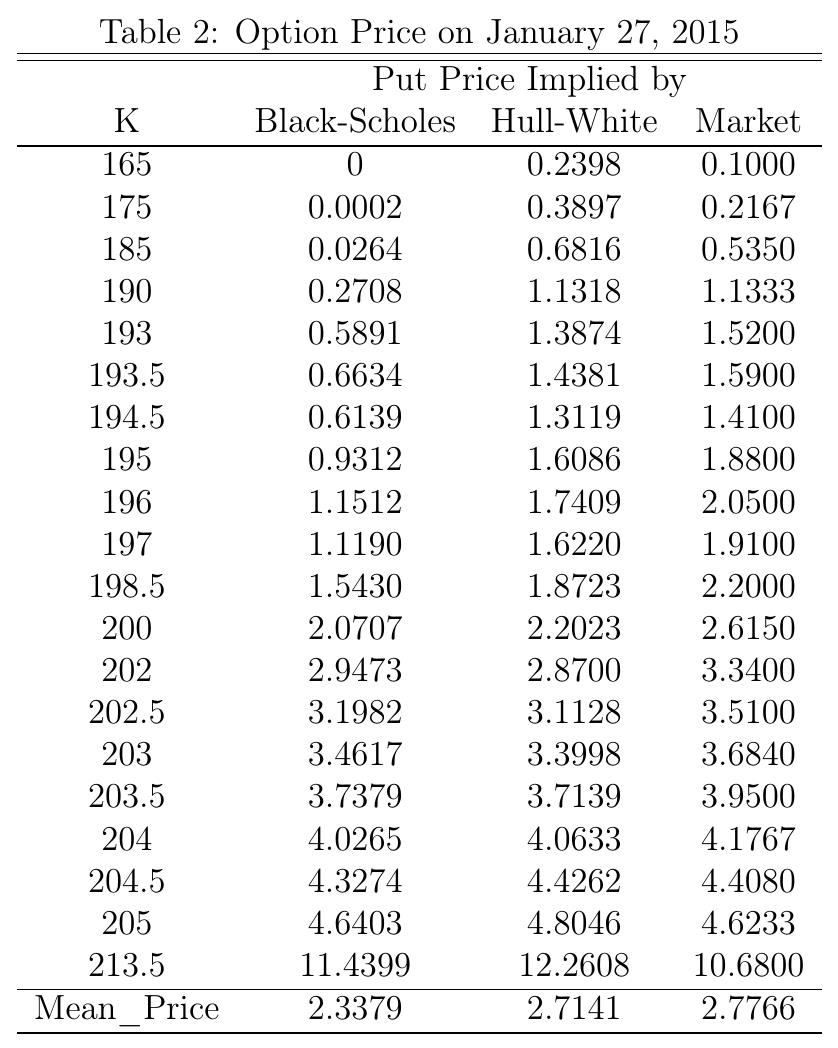

In [174]:
Image("D:/ZM-Documents/MATLAB/final-exam-Ziming-Huang/figures/c11.jpg",width=200,height=200)

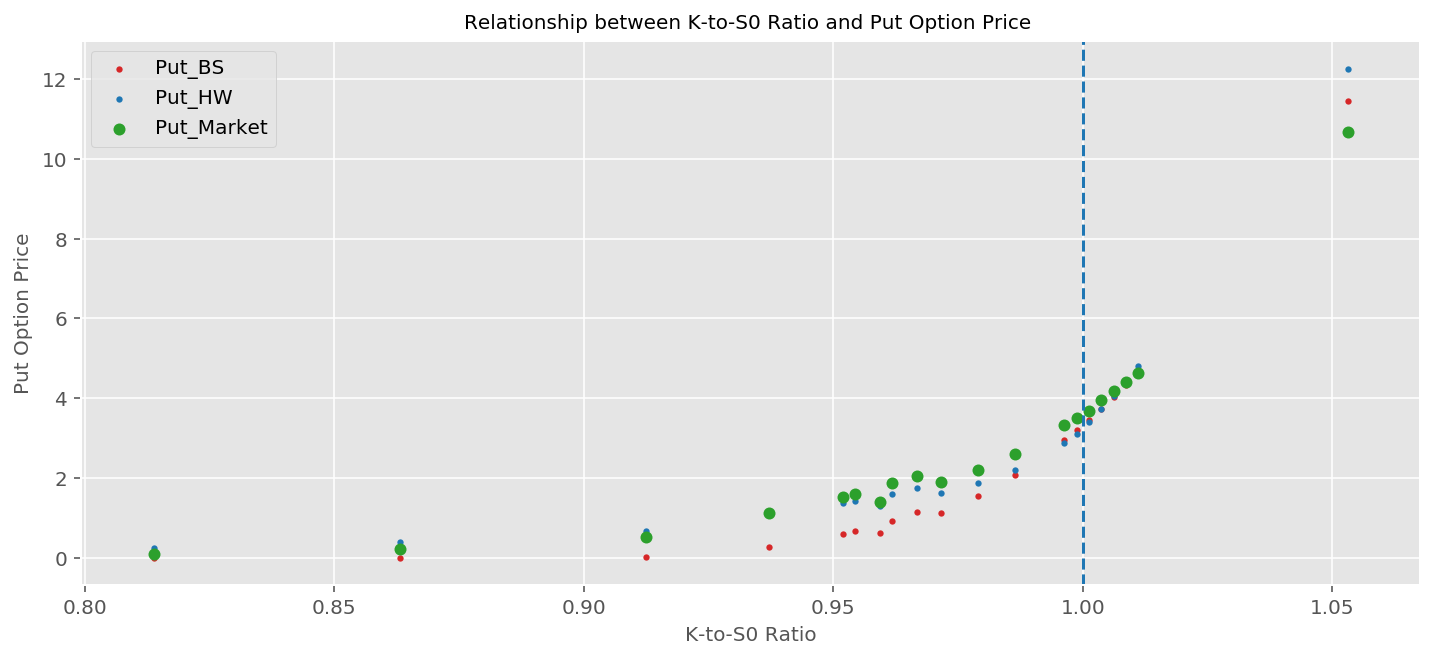

In [176]:
K2S_ratio1=strike_price/spot_price
with plt.style.context("ggplot"): 
    #plt.rcParams['figure.figsize']=(6,3)
    #plt.rcParams['figure.dpi']=300
    %config InlineBackend.figure_format='retina'
    plt.figure(figsize=(12,5))
    data1= K2S_ratio1
    data2= BS_opt1
    data3= HW_opt1
    data4= put_price
    line1=plt.scatter(data1,data2,color='tab:red',s=10,linewidths=0.0,label='Put_BS')
    line2=plt.scatter(data1,data3,color='tab:blue',s=10,linewidths=0.0,label='Put_HW')
    line3=plt.scatter(data1,data4,color='tab:green',linewidths=0.0,label='Put_Market')
    plt.axvline(x=1,color='tab:blue',ls='--')
    plt.xlabel('K-to-S0 Ratio',fontsize=10)
    plt.ylabel('Put Option Price',fontsize=10)
    plt.title('Relationship between K-to-S0 Ratio and Put Option Price ',fontsize=10)
    plt.legend()
    


According to the figure, both the H-W and B-S model are under-pricing when option is OTM and over-pricing when option is ITM.


When the option is OTM, using H-W model is better than B-S model; When the option is ATM (or nearly ATM), the pricing performances for both models are equally good; When the option is ITM, B-S model works better than H-W model.


Given this figure, the adjustment in H-W model does help improve the pricing performance.

#### Exercise 2

#### 2A

In [99]:
#2
import pandas as pd
def load_stock(filename):
    return pd.read_csv(filename,
    header=None,
            names=["Date","Time","Price"],
            parse_dates=[[0,1]],
            index_col=0,
            date_parser=lambda x: pd.datetime.strptime(x,"%Y%m%d %H%M"))

def stock_r(filename):
    stock=load_stock(filename)
    r=np.log(stock).diff(axis=0)
    r[0::78]=None
    r=r.dropna()
    r.columns=['log_return']
    dates=r.index.date 
    day_r=[]
    for date,df in r.groupby(dates):
        day_r.append(df.sum(axis=0))

    return r,day_r

def stock_rv(r):
    r1=r.copy()
    r2=r.copy()
    r3=r.copy()
    r1[r<0]=0 #positive return
    r2[r>=0]=0 #negative return
    r1.columns=['rv+']
    r2.columns=['rv-']
    r3.columns=['rv']
#--------
    dates=r.index.date  
    rv=[]
    rv1=[]
    rv2=[]
    
    for date,df in r1.groupby(dates):
        rv1.append((df**2).sum(axis=0))
    for date,df in r2.groupby(dates):
        rv2.append((df**2).sum(axis=0))
    for date,df in r3.groupby(dates):
        rv.append((df**2).sum(axis=0))
        
    df1=pd.DataFrame(data=rv)
    df2=pd.DataFrame(data=rv1)
    df3=pd.DataFrame(data=rv2)   
    day=pd.to_datetime(np.unique(dates))
    df1=df1.set_index(np.unique(dates))  
    df2=df2.set_index(np.unique(dates))  
    df3=df3.set_index(np.unique(dates))  
    
    return df1,df2,df3
    

In [100]:
#2A
spy_r,spy_dr=stock_r("D:/ZM-Documents/MATLAB/data/SPY.csv")
dis_r,dis_dr=stock_r("D:/ZM-Documents/MATLAB/data/DIS.csv")
pg_r,pg_dr=stock_r("D:/ZM-Documents/MATLAB/data/PG.csv")#PG

spy_rv,spy_rv1,spy_rv2=stock_rv(spy_r)
dis_rv,dis_rv1,dis_rv2=stock_rv(dis_r)
pg_rv,pg_rv1,pg_rv2=stock_rv(pg_r)

In [101]:
def rbeta(r1,r2):
    #r1 is the market return
    r12=r1*r2
    dates=r1.index.date 
    a=[]
    for date,df in r12.groupby(dates):
        a.append(df.sum(axis=0))
    b=[]
    for date,df in r1.groupby(dates):
        b.append((df**2).sum(axis=0))
    df=pd.DataFrame(data=np.array(a)/b)  
    df.columns=['rbeta']

    return df

In [177]:
dis_rb=rbeta(spy_r,dis_r)
pg_rb=rbeta(spy_r,pg_r)

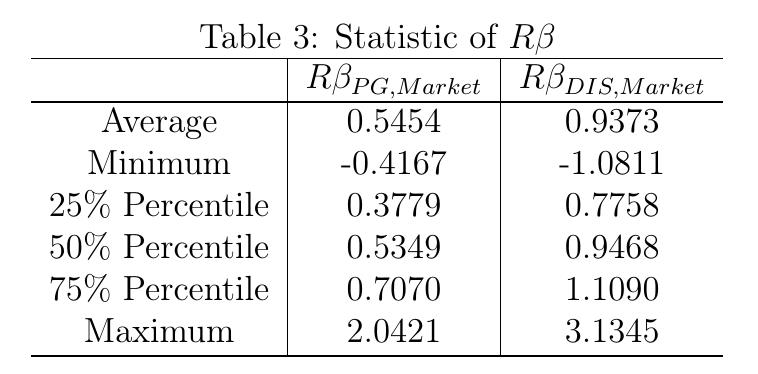

In [104]:
Image("D:/ZM-Documents/MATLAB/final-exam-Ziming-Huang/figures/2a.jpg",width=200,height=200)

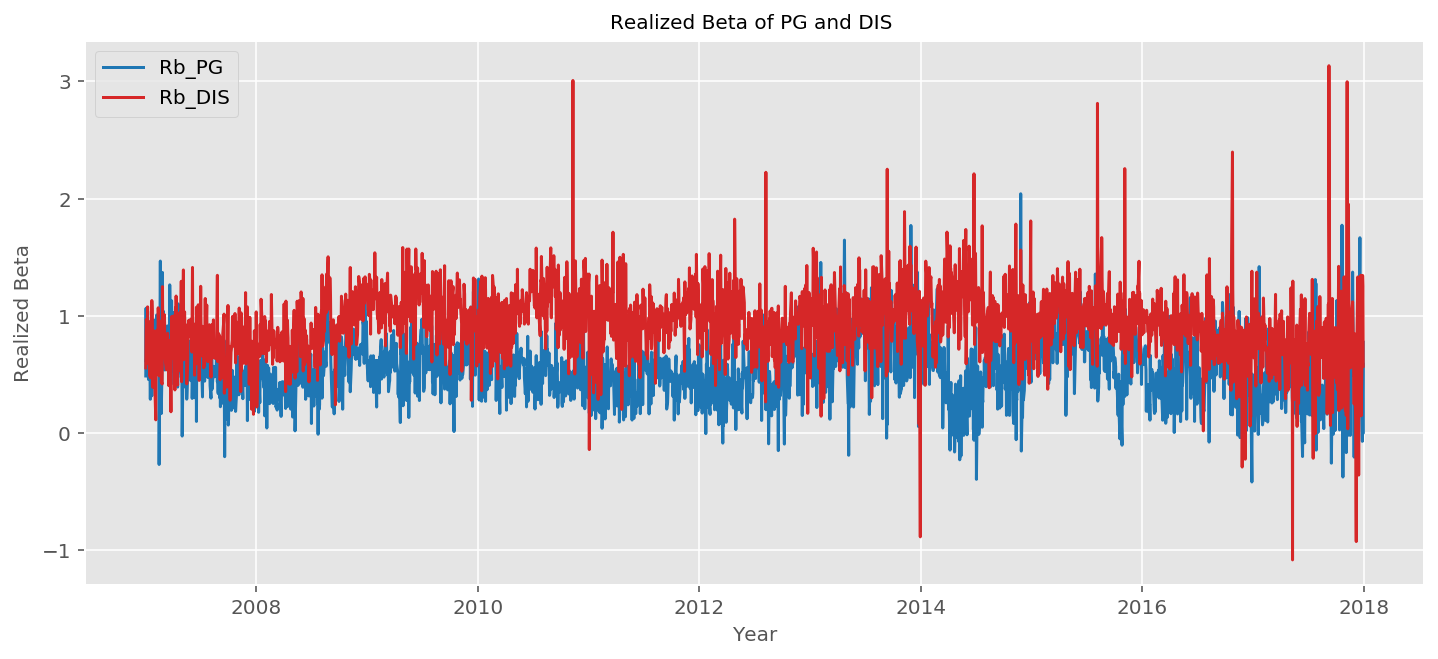

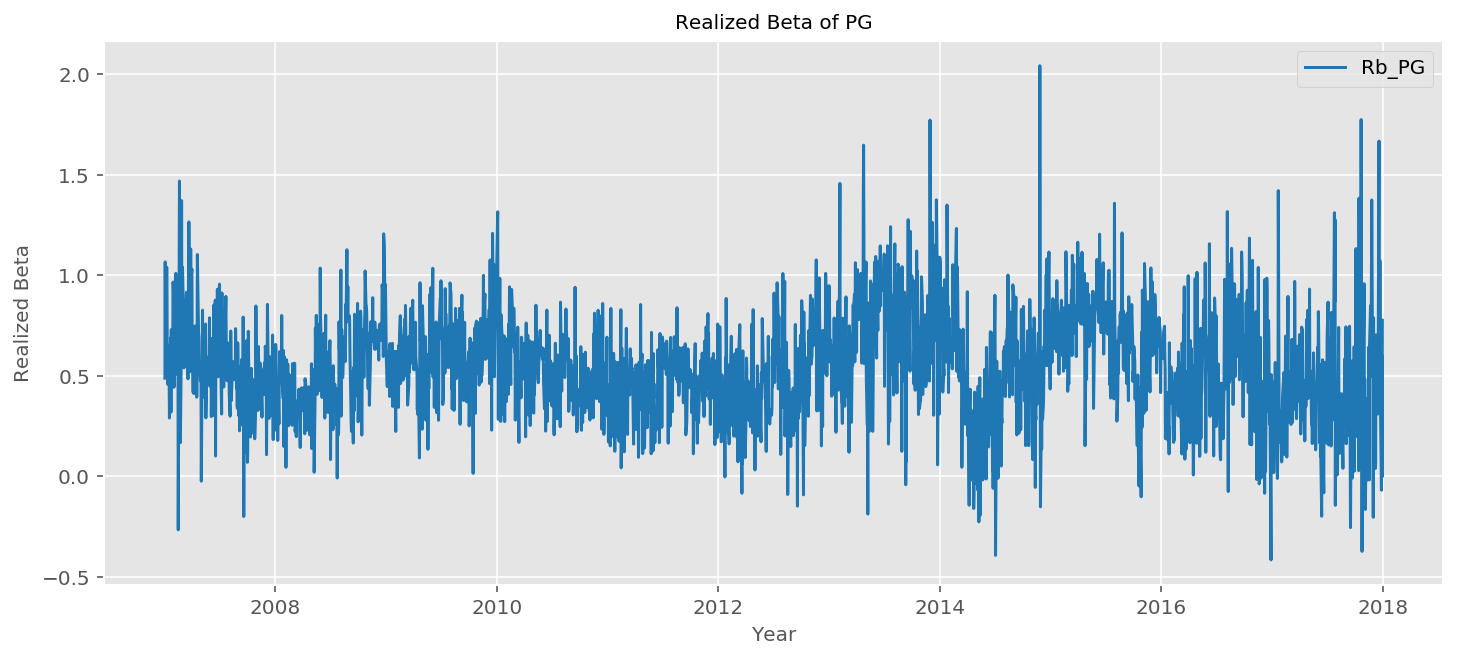

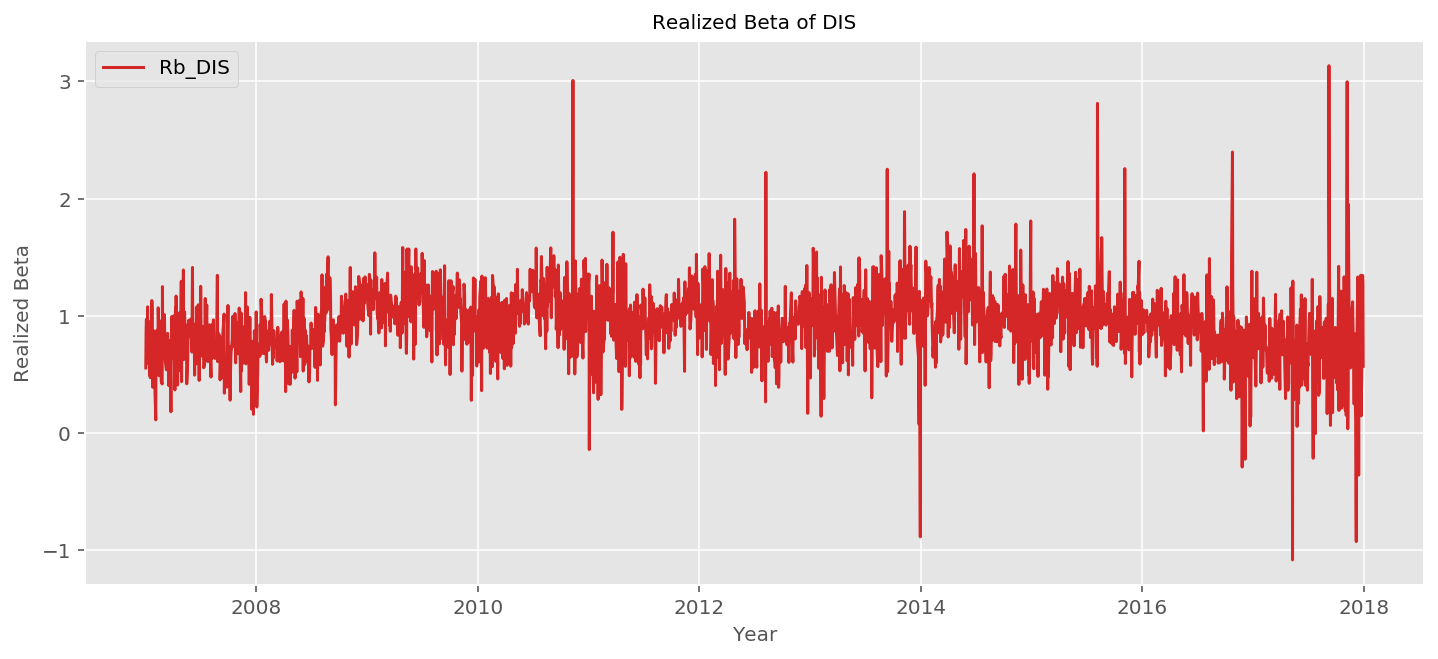

In [184]:
data1= np.unique(spy_r.index.date)
data2= pg_rb
data3= dis_rb
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    plt.plot(data1,data2,color='tab:blue',label='Rb_PG')
    plt.plot(data1,data3,color='tab:red',label='Rb_DIS')
    plt.ylabel('Realized Beta',fontsize=10)
    plt.xlabel('Year',fontsize=10)
    plt.title('Realized Beta of PG and DIS ',fontsize=10)
    plt.legend()

    
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    plt.plot(data1,data2,color='tab:blue',label='Rb_PG')
    plt.ylabel('Realized Beta',fontsize=10)
    plt.xlabel('Year',fontsize=10)
    plt.title('Realized Beta of PG',fontsize=10)
    plt.legend()
    
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    plt.plot(data1,data3,color='tab:red',label='Rb_DIS')
    plt.ylabel('Realized Beta',fontsize=10)
    plt.xlabel('Year',fontsize=10)
    plt.title('Realized Beta of DIS',fontsize=10)
    plt.legend()

The range of $R\beta_{PG,Market}$ is (-0.4167, 2.0421) and the range of $R\beta_{DIS,Market}$ is (-1.0811, 3.1345). According to the table, the mean of $R\beta_{DIS,Market}$ is larger than $R\beta_{PG,Market}$'s, which indicates that the systematic risk of stock DIS is larger than PG's, thus investors will expected a higher return for stock DIS.


According to the figure, the realized beta of PG varies more frequently and its amount of variation is larger than the DIS's, which indicates PG's realized beta has larger volatility than DIS's and the relationship between PG and market is not stable.



#### 2B

In [15]:
#2B
def rv_info(data1,data2,data3,name):
    df1=pd.merge(data1.describe(),data2.describe(),how='left',left_index=True,right_index=True)
    df2=pd.merge(df1,data3.describe(),how='left',left_index=True,right_index=True)
    columns=pd.MultiIndex.from_product([[name],['rv','rv+','rv-']],names=['stock','info'])
    df2.columns=columns
    return df2

In [114]:
rv_info_pg=rv_info(pg_rv,pg_rv1,pg_rv2,'pg')
rv_info_pg1=rv_info(100*np.sqrt(252*pg_rv),100*np.sqrt(252*pg_rv1),100*np.sqrt(252*pg_rv2),'pg')
rv_info_pg2=100*np.sqrt(252*rv_info_pg)

rv_info_dis=rv_info(dis_rv,dis_rv1,dis_rv2,'dis')
rv_info_dis1=rv_info(100*np.sqrt(252*dis_rv),100*np.sqrt(252*dis_rv1),100*np.sqrt(252*dis_rv2),'dis')
rv_info_dis2=100*np.sqrt(252*rv_info_dis)

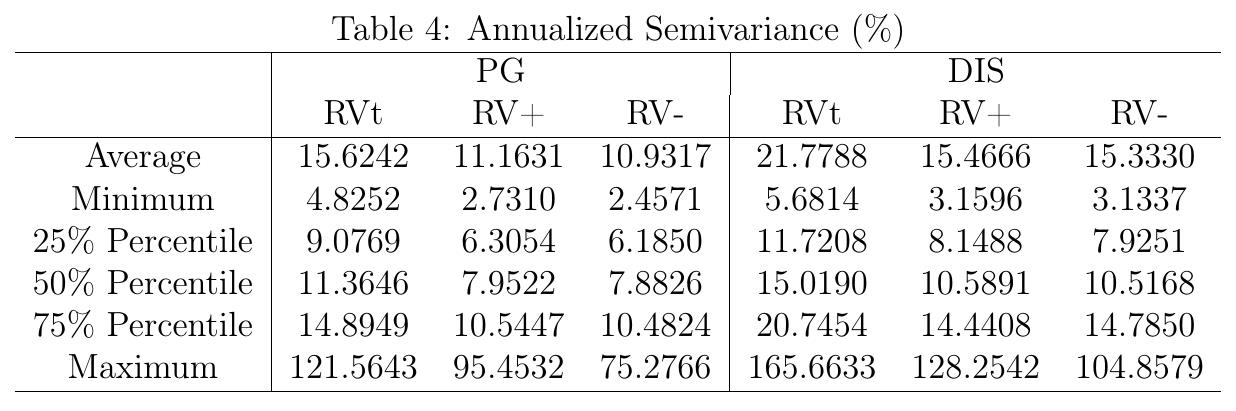

In [113]:
Image("D:/ZM-Documents/MATLAB/final-exam-Ziming-Huang/figures/2bbb.jpg",width=200,height=200)

According to the table, the average value of upsided semivariance is close to the average value of downsided semivariance. The maximum value of the RV+ is significantly larger than RV-'s, which indicates investors will suffer more volatilities for upsided returns.


Compared with DIS, PG' RVs are smaller, so DIS may be a risker stock for investors. This is consistent with PG and DIS' realized betas: DIS' realized beta is larger than PG's, thus DIS will be more risky.

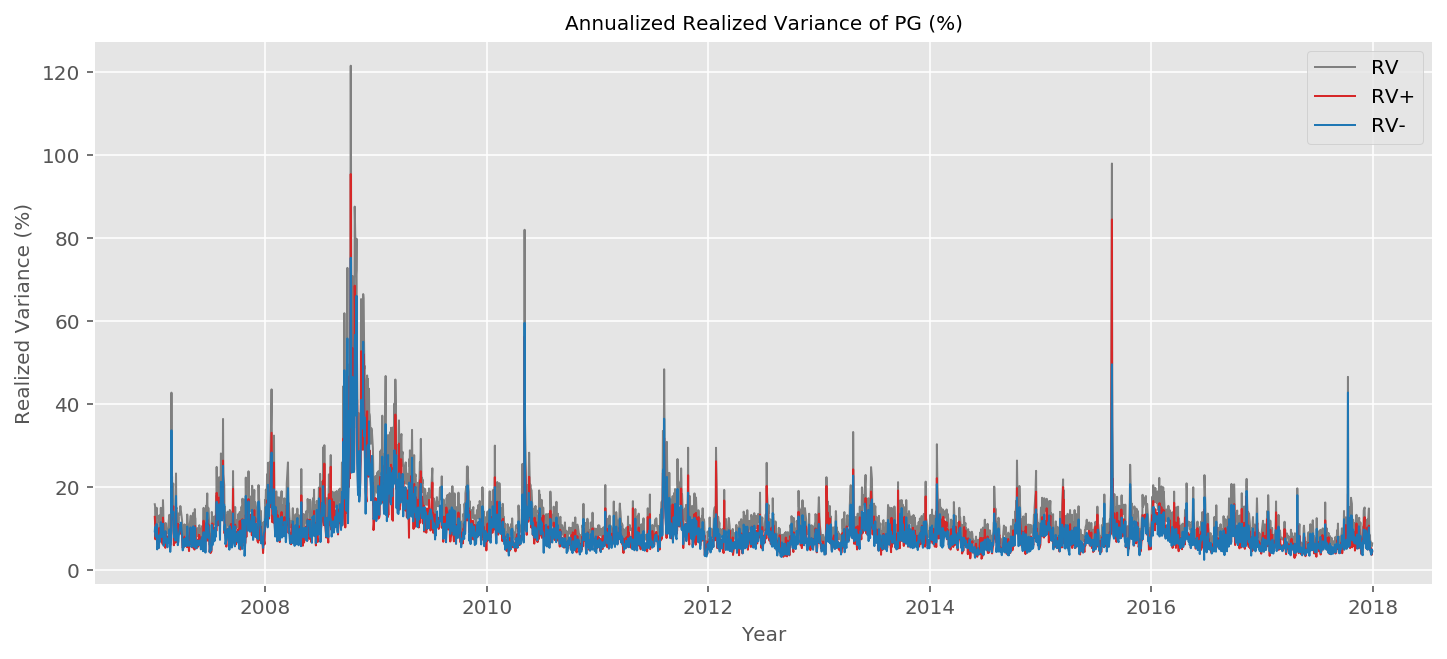

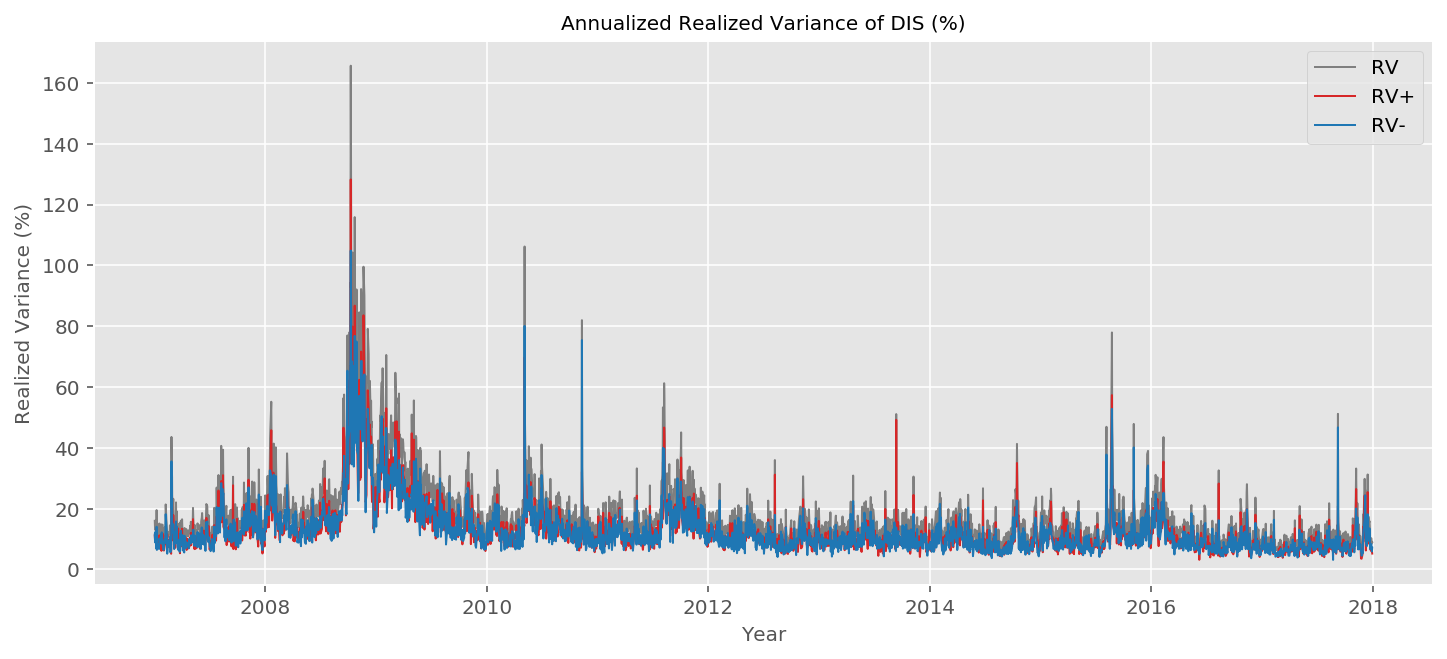

In [183]:
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    data1= np.unique(spy_r.index.date)
    data2= 100*np.sqrt(pg_rv1*252)
    data3= 100*np.sqrt(pg_rv2*252)
    data4= 100*np.sqrt(pg_rv*252)
    line1=plt.plot(data1,data4,color='tab:gray',linewidth=1,label='RV')
    line2=plt.plot(data1,data2,color='tab:red',linewidth=1,label='RV+')
    line3=plt.plot(data1,data3,color='tab:blue',linewidth=1,label='RV-')
    plt.xlabel('Year',fontsize=10)
    plt.ylabel('Realized Variance (%)',fontsize=10)
    plt.title('Annualized Realized Variance of PG (%)',fontsize=10)
    plt.legend()



with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    data1= np.unique(spy_r.index.date)
    data2= 100*np.sqrt(dis_rv1*252)
    data3= 100*np.sqrt(dis_rv2*252)
    data4= 100*np.sqrt(dis_rv*252)
    line1=plt.plot(data1,data4,color='tab:gray',linewidth=1,label='RV')
    line2=plt.plot(data1,data2,color='tab:red',linewidth=1,label='RV+')
    line3=plt.plot(data1,data3,color='tab:blue',linewidth=1,label='RV-')
    plt.xlabel('Year',fontsize=10)
    plt.ylabel('Realized Variance (%)',fontsize=10)
    plt.title('Annualized Realized Variance of DIS (%)',fontsize=10)
    plt.legend()

From the realized variance figures, both PG and DIS' RV is large for several specific periods: around 2009, 2010, 2012 and 2016. These periods are consistent with the financal crisis periods. During these periods, the volatility for both stocks increases, which indicates a closer relationship between individual stock and marker, thusing increases the investment risk.


Even though the total RV increase during the financial crisis, large part of these increments are contributed by upsided RV (RV+). In this case, investors may overestimate the risk of their investment strategies, thus undervaluing their portfolio.

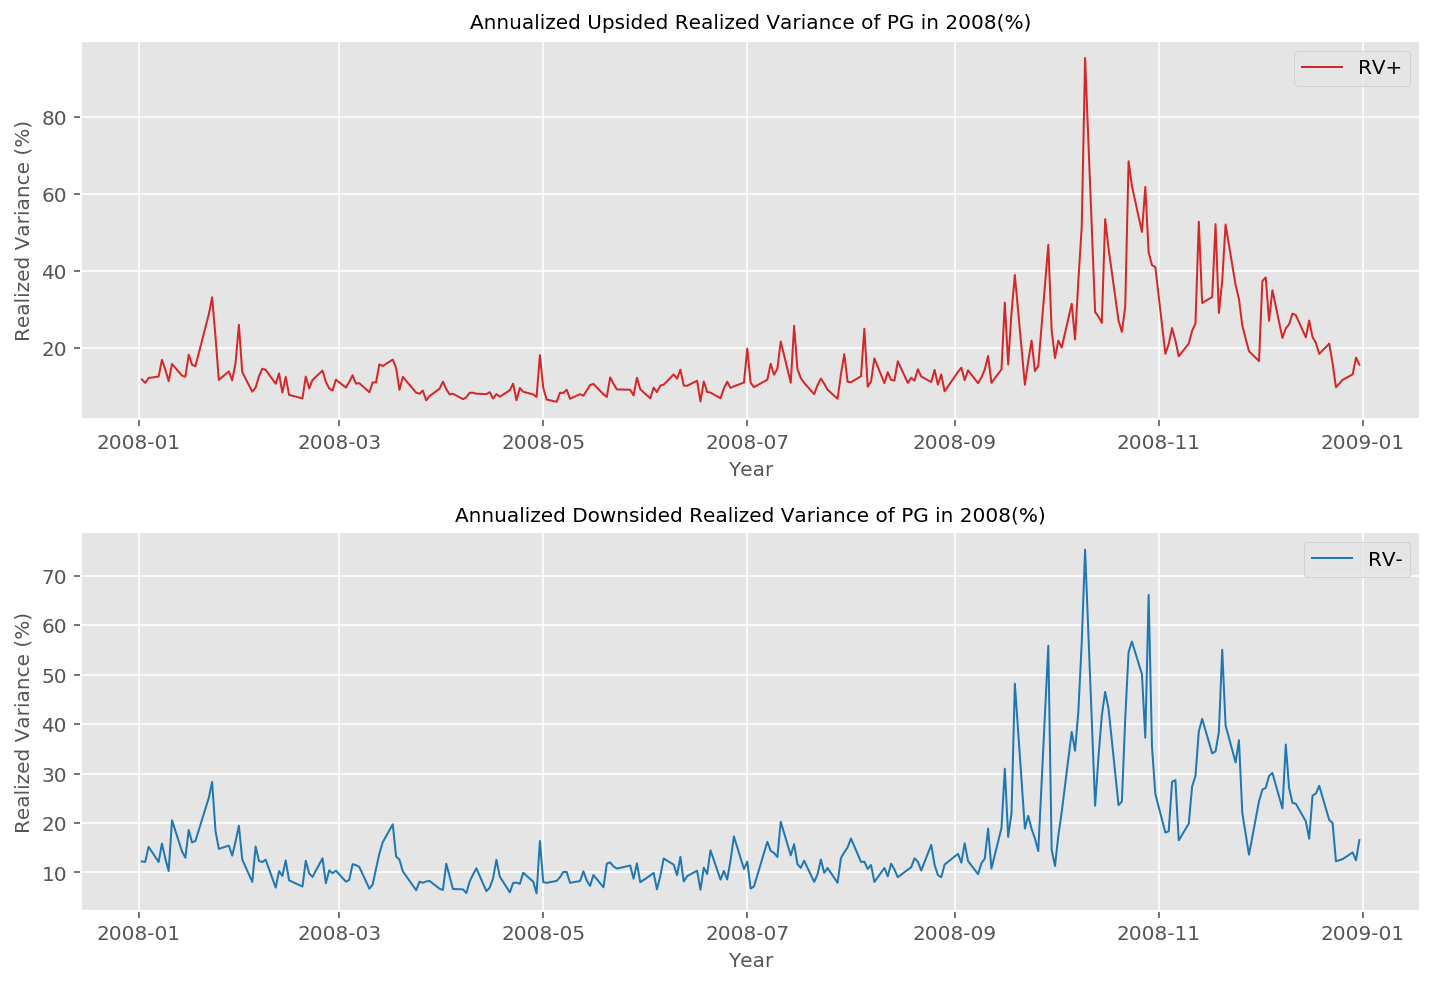

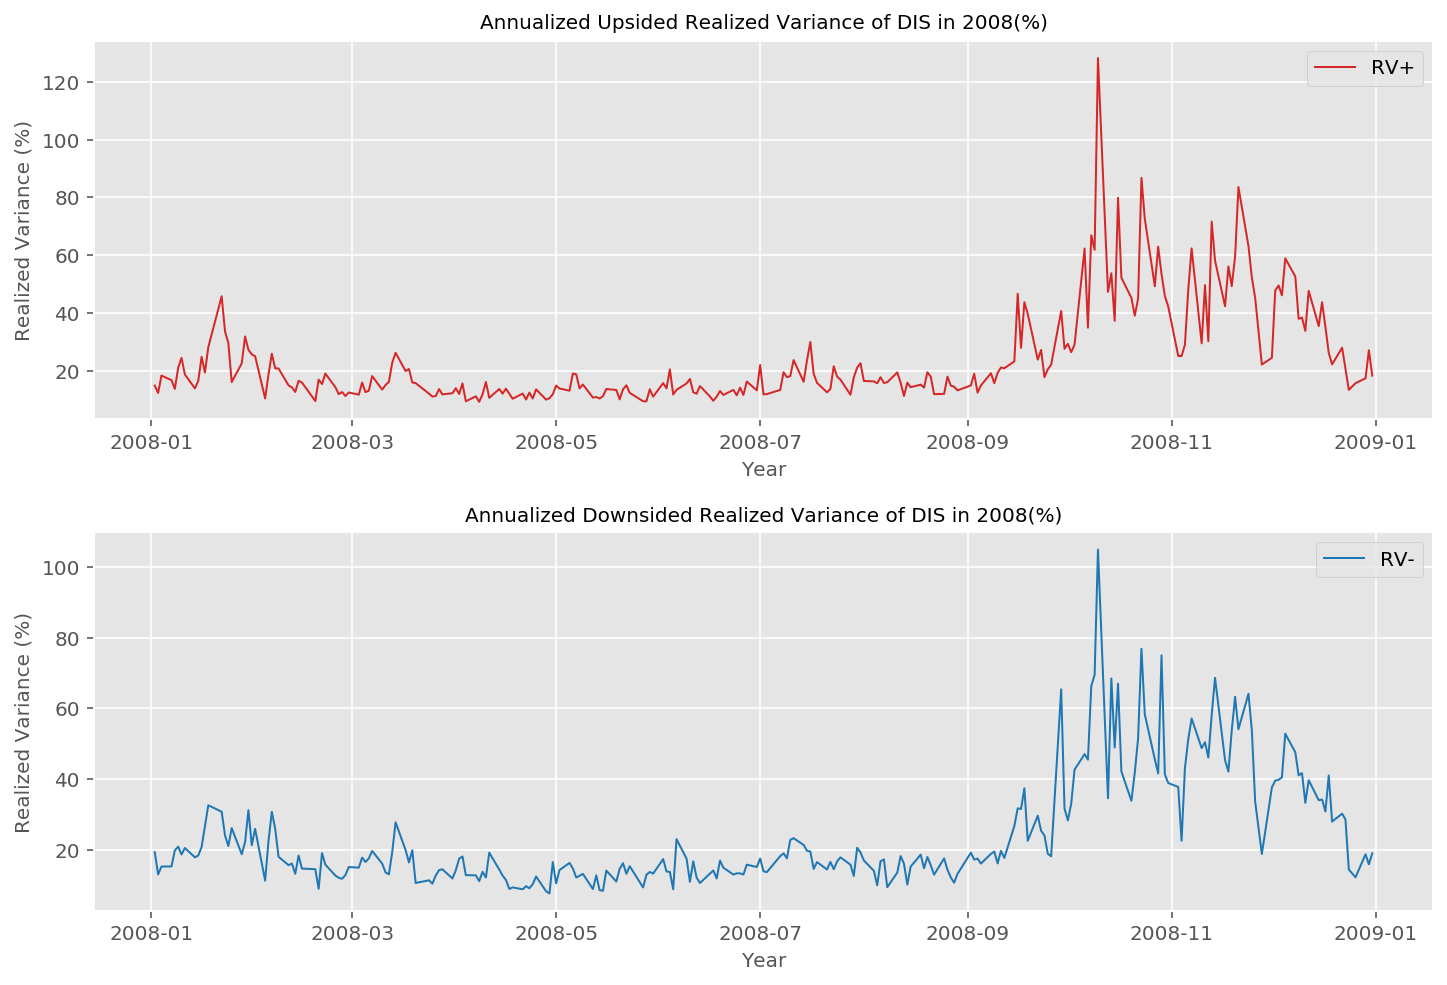

In [142]:
with plt.style.context("ggplot"): 
    
    
    %config InlineBackend.figure_format='retina'
    data1= np.unique(spy_r.index.date)[251:504]
    data2= 100*np.sqrt(pg_rv1*252)[251:504]
    data3= 100*np.sqrt(pg_rv2*252)[251:504]
    data4= 100*np.sqrt(pg_rv*252)[251:504]
    
    fig, axes=plt.subplots(nrows=2,ncols=1,figsize=(12,8))
    plt.subplots_adjust(hspace=0.3)
    
    axes[0].plot(data1,data2,color='tab:red',linewidth=1,label='RV+')
    axes[0].set_xlabel('Year',fontsize=10)
    axes[0].set_ylabel('Realized Variance (%)',fontsize=10)
    axes[0].set_title('Annualized Upsided Realized Variance of PG in 2008(%)',fontsize=10)
    axes[0].legend()
    
    axes[1].plot(data1,data3,color='tab:blue',linewidth=1,label='RV-')
    plt.xlabel('Year',fontsize=10)
    plt.ylabel('Realized Variance (%)',fontsize=10)
    plt.title('Annualized Downsided Realized Variance of PG in 2008(%)',fontsize=10)
    axes[1].legend()



with plt.style.context("ggplot"): 
    
    
    %config InlineBackend.figure_format='retina'
    data1= np.unique(spy_r.index.date)[251:504]
    data2= 100*np.sqrt(dis_rv1*252)[251:504]
    data3= 100*np.sqrt(dis_rv2*252)[251:504]
    data4= 100*np.sqrt(dis_rv*252)[251:504]
    
    fig, axes=plt.subplots(nrows=2,ncols=1,figsize=(12,8))
    plt.subplots_adjust(hspace=0.3)
    
    axes[0].plot(data1,data2,color='tab:red',linewidth=1,label='RV+')
    axes[0].set_xlabel('Year',fontsize=10)
    axes[0].set_ylabel('Realized Variance (%)',fontsize=10)
    axes[0].set_title('Annualized Upsided Realized Variance of DIS in 2008(%)',fontsize=10)
    axes[0].legend()
    
    axes[1].plot(data1,data3,color='tab:blue',linewidth=1,label='RV-')
    plt.xlabel('Year',fontsize=10)
    plt.ylabel('Realized Variance (%)',fontsize=10)
    plt.title('Annualized Downsided Realized Variance of DIS in 2008(%)',fontsize=10)
    axes[1].legend()

According to the semivariance figure, RV+ comove with RV-. During the financial crisis, both RV+ and RV- increase and the extent of the increments are similar, even though the increment of RV+ is a little larger than the RV-'s. 


#### 2C

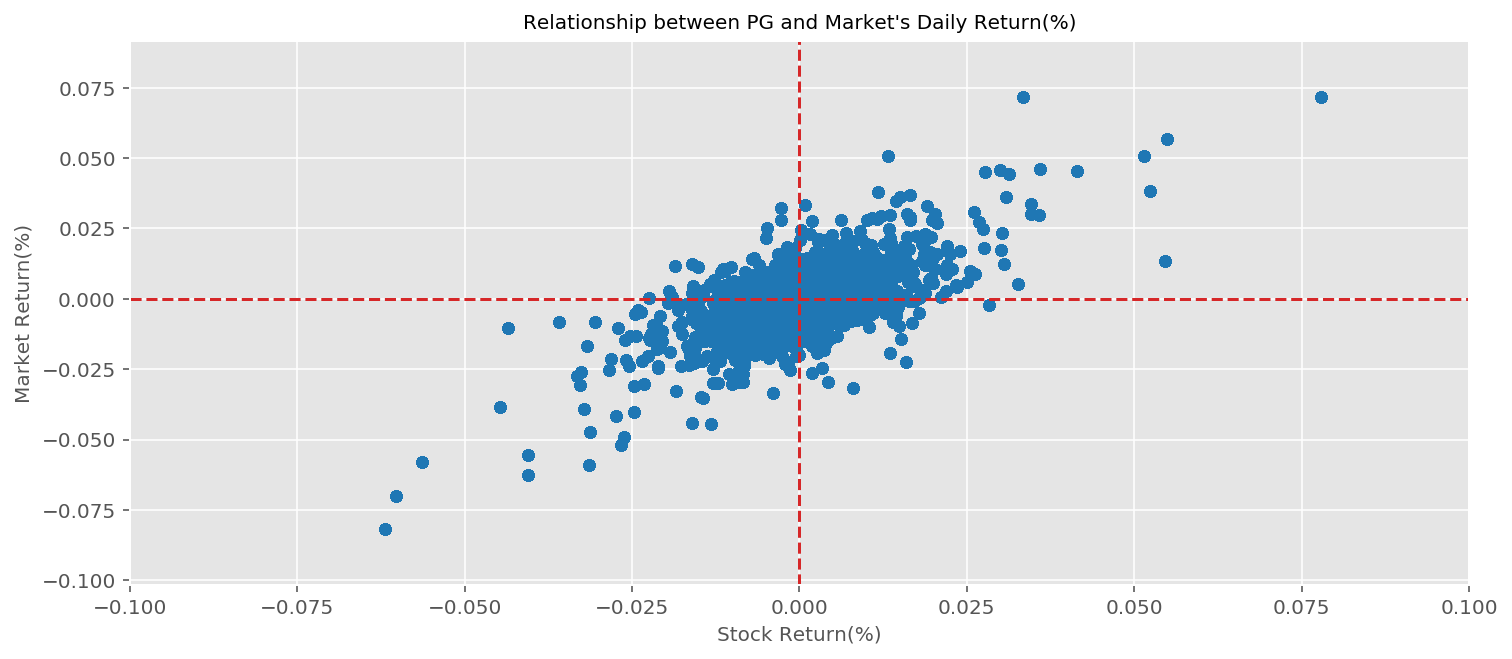

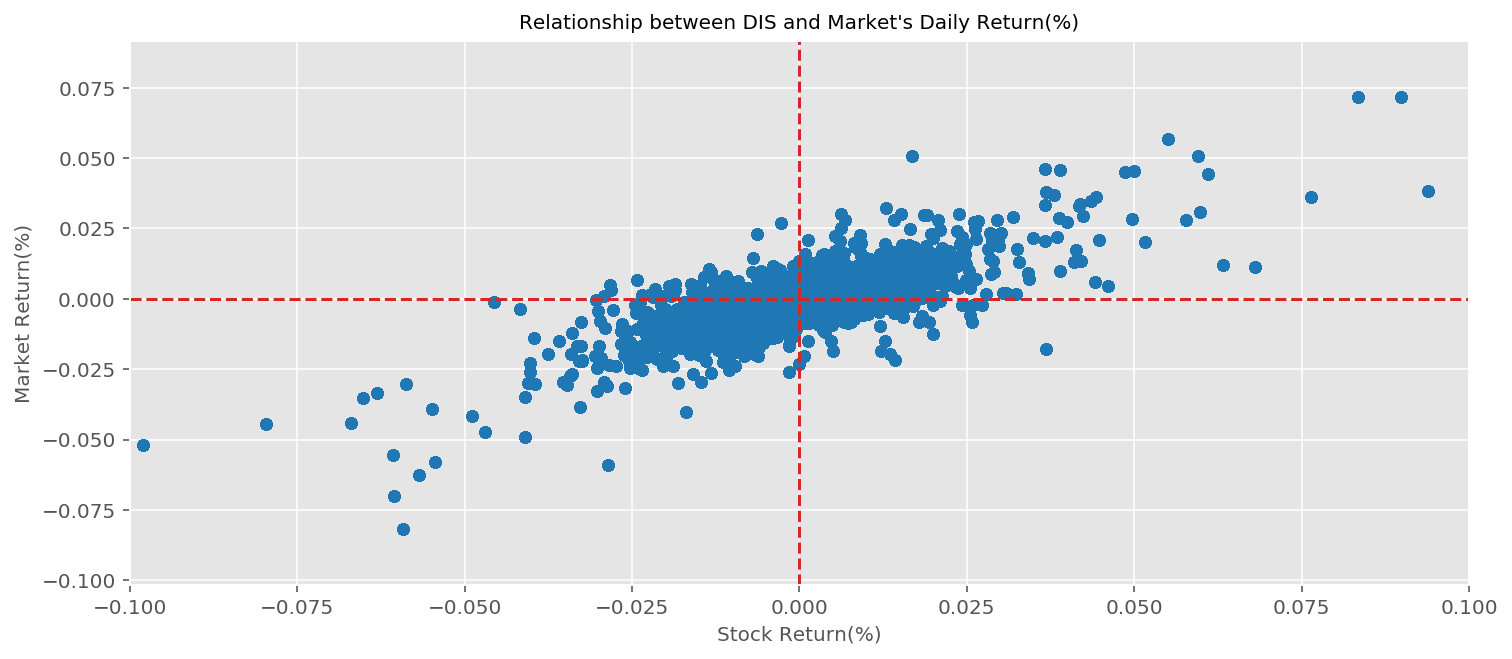

In [154]:
#2C
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina' 
    data1= pg_dr*100
    data2= spy_dr*100
    line1=plt.scatter(data1,data2,color='tab:blue',linewidth=0)

    plt.ylabel('Market Return(%)',fontsize=10)
    plt.xlabel('Stock Return(%)',fontsize=10)
    plt.axvline(x=0,color='tab:red',ls='--')
    plt.axhline(y=0,color='tab:red',ls='--')
    plt.xlim([-0.1,0.1])
    plt.title("Relationship between PG and Market's Daily Return(%)",fontsize=10)
    
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    data1= dis_dr*100
    data2= spy_dr*100
    line1=plt.scatter(data1,data2,color='tab:blue',linewidth=0)

    plt.ylabel('Market Return(%)',fontsize=10)
    plt.xlabel('Stock Return(%)',fontsize=10)
    plt.axvline(x=0,color='tab:red',ls='--')
    plt.axhline(y=0,color='tab:red',ls='--')
    plt.xlim([-0.1,0.1])
    plt.title("Relationship between DIS and Market's Daily Return(%)",fontsize=10)
    
    

- 1st quadrant: $r_{market}>0$ and $r_{stock}>0$
- 2nd quadrant: $r_{market}>0$ and $r_{stock}<0$
- 3rd quadrant: $r_{market}<0$ and $r_{stock}<0$
- 4th quadrant: $r_{market}<0$ and $r_{stock}>0$


- 1st quadrant: stock positively comove with the market return when the market returns are positive 

- 2nd quadrant: stock negatively comove with the market return when the market returns are positive 

- 3rd quadrant: stock positively comove with the market return when the market returns are negative 

- 4th quadrant: stock negatively comove with the market return when the market returns are negative


For stock PG: the number of observations which fall into 1st and 3rd quadrants is slightly larger than the number of 2nd and 4th observations. This indicates PG positively comove with market, however, the intensity of comovement is not strong, thus impling that the $\beta_{PG}$ is positive and around 0.5.


For stock DIS: except a small part of observations fall into  2nd and 4th quadrant, most of observations fall into 1st and 3rd quadrants. Combining with the distribution of these observations, it is reasonable to imply that $\beta_{DIS}$ is around 1.

#### 2D

Positively comove stocks demand a higher risk premium than negatively comove stocks.

For positively comove stock, when the market return is negative, the stock return will be negative, which indicates the loss risk of the total portfolio will increase if the investor adds this stock into his portpolio, thusing demanding for more risk premium.


For negatively comove stock, when the when the market return is negative, the stock return will be positive, which implies this stock type could be a good hedge stock to against the market downside risk. Even for low risk premium, investor would like to include this stock into his portfolio for hedging purpose.


According the the stock and market indx return in part(C), the number of oberservations fall into 3rd quadrant is bigger than 4th quadrant's, which indicates both PG and DIS are comove positively with the market when the market is perfoming poorly.

#### 2E

In [145]:
import pandas as pd


def stock_rv(r):
    r1=r.copy()
    r2=r.copy()
    r3=r.copy()
    r1[r<0]=0 #positive return
    r2[r>=0]=0 #negative return
    r1.columns=['rv+']
    r2.columns=['rv-']
    r3.columns=['rv']
#--------
    dates=r.index.date  
    rv=[]
    rv1=[]
    rv2=[]
    for date,df in r3.groupby(dates):
        rv.append((df**2).sum(axis=0))
    for date,df in r1.groupby(dates):
        rv1.append((df**2).sum(axis=0))
    for date,df in r2.groupby(dates):
        rv2.append((df**2).sum(axis=0))
    df1=pd.DataFrame(data=rv)
    df2=pd.DataFrame(data=rv1)
    df3=pd.DataFrame(data=rv2)   
    
    df1=df1.set_index(np.unique(dates))  
    df2=df2.set_index(np.unique(dates))  
    df3=df3.set_index(np.unique(dates))  
    
    return df1,df2,df3
    

In [146]:
def rbeta4(r1,r2,name):
    r1p=r1.copy()
    r1n=r1.copy()
    r2p=r2.copy()
    r2n=r2.copy()
    r1p[r1<0]=0
    r1n[r1>=0]=0
    r2p[r2<0]=0
    r2n[r2>=0]=0
 #-------------------------
    rpp=r1p*r2p
    rpn=r1p*r2n
    rnp=r1n*r2p
    rnn=r1n*r2n

    dates=r1.index.date 
    a1=[]
    for date,df in rpp.groupby(dates):
        a1.append(df.sum(axis=0))
    a2=[]
    for date,df in rpn.groupby(dates):
        a2.append(df.sum(axis=0))
    a3=[]
    for date,df in rnp.groupby(dates):
        a3.append(df.sum(axis=0))
    a4=[]
    for date,df in rnn.groupby(dates):
        a4.append(df.sum(axis=0))        
    b=[]
    for date,df in r1.groupby(dates):
        b.append((df**2).sum(axis=0))   
                
    df1=pd.DataFrame(data=np.array(a1)/b) 
    df2=pd.DataFrame(data=np.array(a2)/b) 
    df3=pd.DataFrame(data=np.array(a3)/b) 
    df4=pd.DataFrame(data=np.array(a4)/b) 
    
    k1=pd.merge(df1.describe(),df2.describe(),how='left',left_index=True,right_index=True)
    k2=pd.merge(k1,df3.describe(),how='left',left_index=True,right_index=True)
    k3=pd.merge(k2,df4.describe(),how='left',left_index=True,right_index=True)
    columns=pd.MultiIndex.from_product([[name],['rb++','rb+-','rb-+','rb--']],names=['stock','Realized Beta'])
    k3.columns=columns

    return k3,df1,df2,df3,df4

In [147]:
def data_info(data1,data2,data3,name):
    df1=pd.merge(data1.describe(),data2.describe(),how='left',left_index=True,right_index=True)
    df2=pd.merge(df1,data3.describe(),how='left',left_index=True,right_index=True)
    columns=pd.MultiIndex.from_product([[name],['rv','rv+','rv-']],names=['stock','info'])
    df2.columns=columns
    return df2

In [148]:
pg_k3,pg_df1,pg_df2,pg_df3,pg_df4=rbeta4(spy_r,pg_r,'pg')
dis_k3,dis_df1,dis_df2,dis_df3,dis_df4=rbeta4(spy_r,dis_r,'dis')

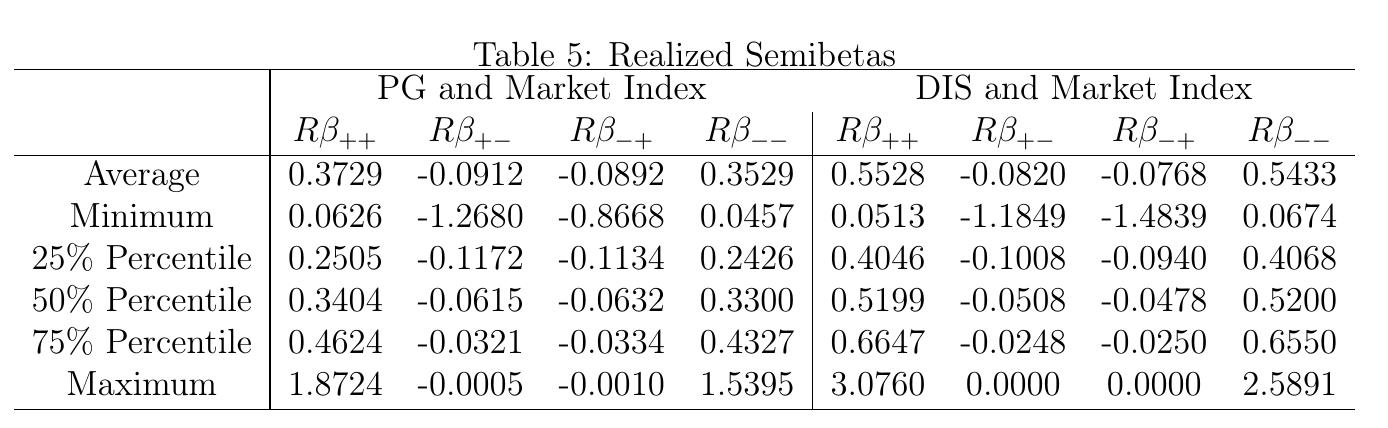

In [89]:
Image("D:/ZM-Documents/MATLAB/final-exam-Ziming-Huang/figures/2c.jpg",width=200,height=200)

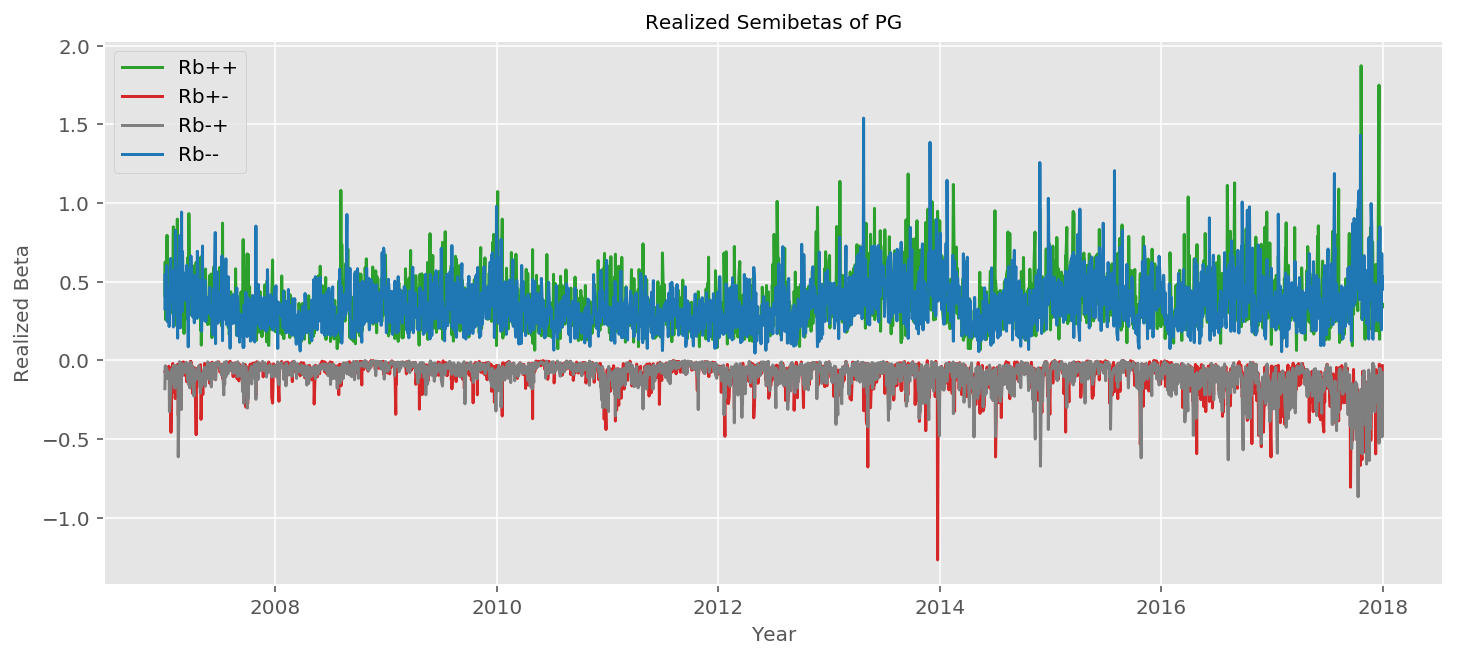

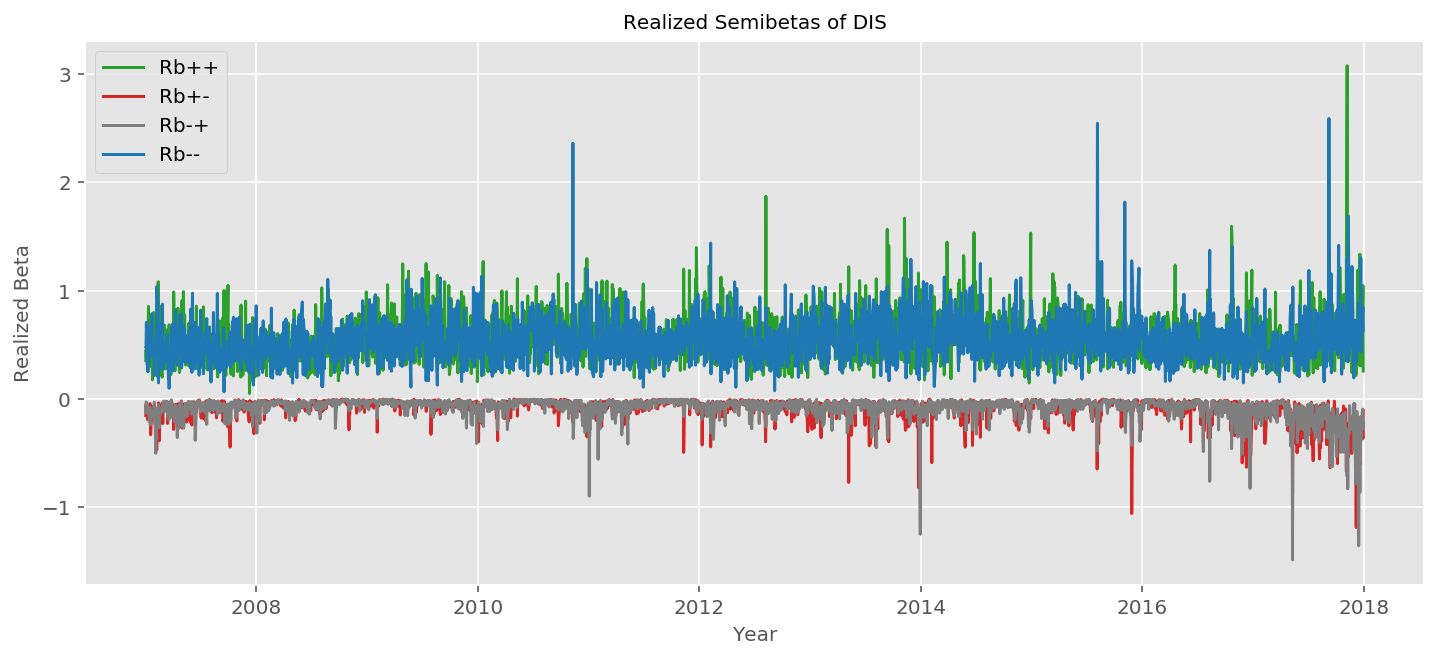

In [153]:
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    data1= np.unique(spy_r.index.date)
    data2= pg_df1
    data3= pg_df2
    data4= pg_df3
    data5= pg_df4
    line1=plt.plot(data1,data2,color='tab:green',label='Rb++')
    line2=plt.plot(data1,data3,color='tab:red',label='Rb+-')
    line3=plt.plot(data1,data4,color='tab:gray',label='Rb-+')
    line4=plt.plot(data1,data5,color='tab:blue',label='Rb--')
    plt.ylabel('Realized Beta',fontsize=10)
    plt.xlabel('Year',fontsize=10)
    plt.title('Realized Semibetas of PG',fontsize=10)
    plt.legend()
               
               
with plt.style.context("ggplot"): 
    plt.figure(figsize=(12,5))
    %config InlineBackend.figure_format='retina'
    data1= np.unique(spy_r.index.date)
    data2= dis_df1
    data3= dis_df2
    data4= dis_df3
    data5= dis_df4
    line1=plt.plot(data1,data2,color='tab:green',label='Rb++')
    line2=plt.plot(data1,data3,color='tab:red',label='Rb+-')
    line3=plt.plot(data1,data4,color='tab:gray',label='Rb-+')
    line4=plt.plot(data1,data5,color='tab:blue',label='Rb--')
    plt.ylabel('Realized Beta',fontsize=10)
    plt.xlabel('Year',fontsize=10)
    plt.title('Realized Semibetas of DIS',fontsize=10)
    plt.legend()

In general, the semibetas for both stocks are relatively stable over time, even though there are some fluctuations during several periods.


According to the CAPM model, risk premium is calculated as the product of $\beta$ and market excess return. The lower absolute values of $R\beta^{-+}$ and $R\beta^{+-}$ indicate the covariance of positively comove yield lower (or near zero) risk premium regardless the market performance.


For investors that are only concern about the downside risk, they should focus on the covaraice of negatively comove part, since the covariance of positively comove may not be price. In other word, only the $R\beta^{--}$ matters when pricing stocks. Since $R\beta^{--}_{DIS}=0.5433$ and $R\beta^{--}_{PG}=0.3529$, the DIS should have a higher risk premium, thus a higher price.